In [52]:
import pandas as pd
import numpy as np
from IPython.display import display

data_train = pd.read_csv("output_train(5440特征GMM分类).csv", header=0)
data_test = pd.read_csv("output_test_3cluster.csv", header=0)
data_validation = pd.read_csv("output_validation_3cluster.csv", header=0)
data_test.head(3)

,Unnamed: 0,Unnamed: 0.1,DPM1,C1orf112,FGR,FUCA2,NIPAL3,LAS1L,ANKIB1,KRIT1,...,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,type,Stage,Gender,age,cluster
0,0,Vumc-GBM-475-TR1362,2.042600,3.335600,4.296881,4.538599,5.884916,1.218640,4.575222,4.538599,...,7.228032,9.589012,5.969893,4.679824,5.208840,Glioma,NaN,M,79.0,0
1,1,Vumc-GBM-550t0-TR1519,2.983188,3.628931,4.687254,4.335098,6.182609,2.983188,5.249428,4.335098,...,7.407085,8.642508,6.499717,5.116511,5.162191,Glioma,NaN,M,34.0,2
2,2,Maas-GBM-M00004-TR2113,6.287489,3.336306,1.218640,5.555245,1.218640,1.218640,4.159713,1.218640,...,7.301816,9.844749,5.669815,5.221307,4.159713,Glioma,NaN,F,63.0,0


In [53]:
print(data_train.type.value_counts())
print(data_train.Stage.value_counts())

Non-small-cell lung cancer    207
Ovarian cancer                 59
Pancreatic cancer              56
Glioma                         54
Breast cancer                  44
Colorectal cancer              35
Head and neck cancer           34
Cholangiocarcinoma             32
Melanoma                       23
Endometrial cancer             18
Sarcoma                        17
Urothelial cancer              14
Renal cell cancer              14
Multiple Myeloma               12
Prostate cancer                10
Hepatocellular carcinoma       10
Lymphoma                        8
Esophageal carcinoma            5
Name: type, dtype: int64
IV     329
III     92
II      75
I       48
Name: Stage, dtype: int64


In [54]:
outcome_variable = 'type'

from collections import Counter
b = np.array(data_train[outcome_variable])
b = b.tolist()
b = dict(Counter(b)) # 列表计数
type_name = []
for key, value in b.items():
    type_name.append(key)
print(type_name)

['Glioma', 'Non-small-cell lung cancer', 'Pancreatic cancer', 'Breast cancer', 'Head and neck cancer', 'Melanoma', 'Ovarian cancer', 'Colorectal cancer', 'Multiple Myeloma', 'Sarcoma', 'Cholangiocarcinoma', 'Hepatocellular carcinoma', 'Endometrial cancer', 'Esophageal carcinoma', 'Lymphoma', 'Prostate cancer', 'Renal cell cancer', 'Urothelial cancer']


In [55]:
pancancer = ['Cholangiocarcinoma', 'Ovarian cancer', 'Sarcoma', 'Non-small-cell lung cancer', 
             'Esophageal carcinoma', 'Pancreatic cancer', 'Glioma', 'Breast cancer', 'Colorectal cancer', 'Hepatocellular carcinoma', 
             'Melanoma', 'Renal cell carcinoma', 'Prostate cancer', 'Urothelial cancer', 'Lymphoma', 'Multiple Myeloma', 
             'Endometrial cancer', 'Head and neck cancer']
pan_abr = ['CHOL', 'OVCAR', 'SARC', 'NSCLC', 'ESO', 'PDAC', 'GLIO', 'BRCA', 'CRC', 'HCC', 
             'MELA', 'RCC', 'PRCA', 'URO', 'LYM', 'MM', 'ENDO', 'HNSSC']

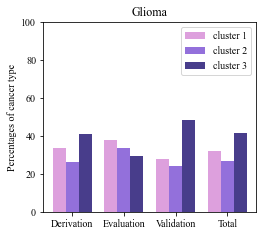

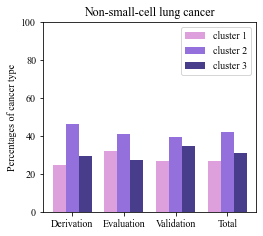

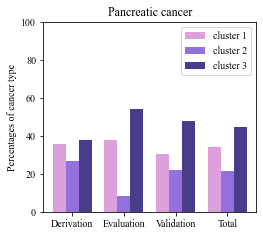

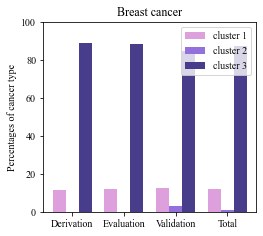

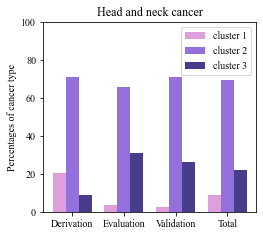

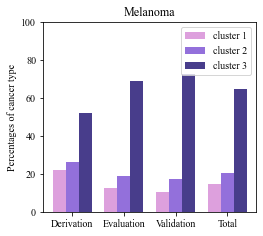

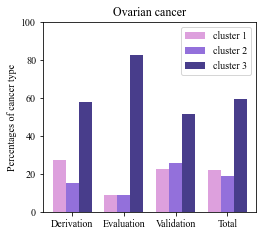

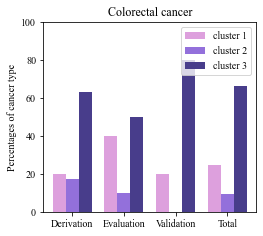

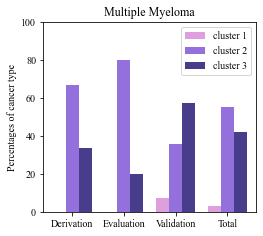

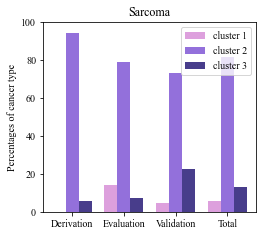

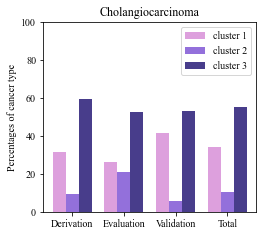

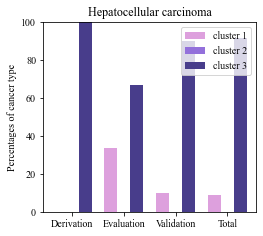

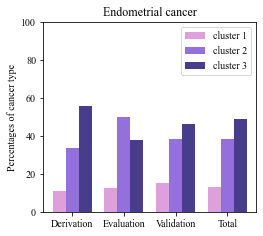

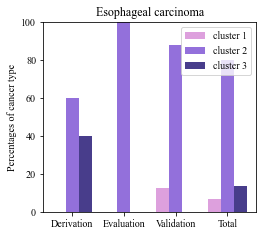

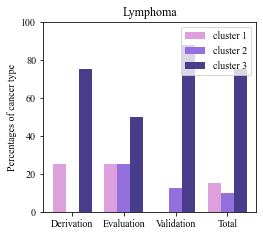

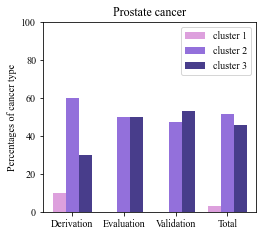

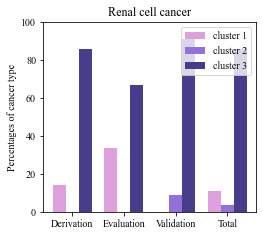

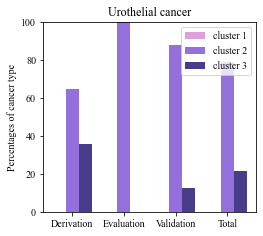

In [50]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt 

with PdfPages('柱状图-type.pdf') as pdf:
    for i in range(len(type_name)):
        
        number_0 = []; number_1 = []; number_2 = []
        name = type_name
        # 总癌数
        try:
            num_total_train = data_train.type.value_counts()[type_name[i]]
        except IndexError:
            num_total_train = 1; num_train = 0
        except KeyError:
            num_total_train = 1; num_train = 0
        else:
            num_total_train = data_train.type.value_counts()[type_name[i]]; num_train = data_train.type.value_counts()[type_name[i]]
            
        try:
            num_total_test = data_test.type.value_counts()[type_name[i]]
        except IndexError:
            num_total_test = 1; num_test = 0
        except KeyError:
            num_total_test = 1; num_test = 0
        else:
            num_total_test = data_test.type.value_counts()[type_name[i]]; num_test = data_test.type.value_counts()[type_name[i]]
        
        try:
            num_total_validation = data_validation.type.value_counts()[type_name[i]]
        except IndexError:
            num_total_validation = 1; num_validation = 0
        except KeyError:
            num_total_validation = 1; num_validation = 0
        else:
            num_total_validation = data_validation.type.value_counts()[type_name[i]]; num_validation = data_validation.type.value_counts()[type_name[i]]
        ######################## cluster 0
        # train
        ana_data = data_train[data_train['cluster'] == 0] # 聚类
        try:
            type_num_train = ana_data.type.value_counts()[type_name[i]]
        except IndexError:
            type_num_train = 0
        except KeyError:
            type_num_train = 0
        else:
            type_num_train = ana_data.type.value_counts()[type_name[i]]
        type_num = type_num_train / num_total_train
        number_0.append(type_num*100)
        # test
        ana_data = data_test[data_test['cluster'] == 0] # 聚类
        try:
            type_num_test = ana_data.type.value_counts()[type_name[i]]
        except IndexError:
            type_num_test = 0
        except KeyError:
            type_num_test = 0
        else:
            type_num_test = ana_data.type.value_counts()[type_name[i]]
        type_num = type_num_test / num_total_test
        number_0.append(type_num*100)
        # validation
        ana_data = data_validation[data_validation['cluster'] == 0] # 聚类
        try:
            type_num_validation = ana_data.type.value_counts()[type_name[i]]
        except IndexError:
            type_num_validation = 0
        except KeyError:
            type_num_validation = 0
        else:
            type_num_validation = ana_data.type.value_counts()[type_name[i]]
        type_num = type_num_validation / num_total_validation
        number_0.append(type_num*100)
        # total
        type_num = (type_num_train + type_num_test + type_num_validation) / (num_train + num_test + num_validation)
        number_0.append(type_num*100)
            
        ######################## cluster 1
        # train
        ana_data = data_train[data_train['cluster'] == 1] # 聚类
        try:
            type_num_train = ana_data.type.value_counts()[type_name[i]]
        except IndexError:
            type_num_train = 0
        except KeyError:
            type_num_train = 0
        else:
            type_num_train = ana_data.type.value_counts()[type_name[i]]
        type_num = type_num_train / num_total_train
        number_1.append(type_num*100)
        # test
        ana_data = data_test[data_test['cluster'] == 1] # 聚类
        try:
            type_num_test = ana_data.type.value_counts()[type_name[i]]
        except IndexError:
            type_num_test = 0
        except KeyError:
            type_num_test = 0
        else:
            type_num_test = ana_data.type.value_counts()[type_name[i]]
        type_num = type_num_test / num_total_test
        number_1.append(type_num*100)
        # validation
        ana_data = data_validation[data_validation['cluster'] == 1] # 聚类
        try:
            type_num_validation = ana_data.type.value_counts()[type_name[i]]
        except IndexError:
            type_num_validation = 0
        except KeyError:
            type_num_validation = 0
        else:
            type_num_validation = ana_data.type.value_counts()[type_name[i]]
        type_num = type_num_validation / num_total_validation
        number_1.append(type_num*100)
        # total
        type_num = (type_num_train + type_num_test + type_num_validation) / (num_train + num_test + num_validation)
        number_1.append(type_num*100)  
        
        ######################## cluster 2
        # train
        ana_data = data_train[data_train['cluster'] == 2] # 聚类
        try:
            type_num_train = ana_data.type.value_counts()[type_name[i]]
        except IndexError:
            type_num_train = 0
        except KeyError:
            type_num_train = 0
        else:
            type_num_train = ana_data.type.value_counts()[type_name[i]]
        type_num = type_num_train / num_total_train
        number_2.append(type_num*100)
        # test
        ana_data = data_test[data_test['cluster'] == 2] # 聚类
        try:
            type_num_test = ana_data.type.value_counts()[type_name[i]]
        except IndexError:
            type_num_test = 0
        except KeyError:
            type_num_test = 0
        else:
            type_num_test = ana_data.type.value_counts()[type_name[i]]
        type_num = type_num_test / num_total_test
        number_2.append(type_num*100)
        # validation
        ana_data = data_validation[data_validation['cluster'] == 2] # 聚类
        try:
            type_num_validation = ana_data.type.value_counts()[type_name[i]]
        except IndexError:
            type_num_validation = 0
        except KeyError:
            type_num_validation = 0
        else:
            type_num_validation = ana_data.type.value_counts()[type_name[i]]
        type_num = type_num_validation / num_total_validation
        number_2.append(type_num*100)
        # total
        type_num = (type_num_train + type_num_test + type_num_validation) / (num_train + num_test + num_validation)
        number_2.append(type_num*100)         
        
        # 三组数据
        fig = plt.figure(figsize=(13, 3.5))
        plt.rc('font', family='Times New Roman')
        plt.subplot(132)
        labels = ['Derivation', 'Evaluation', 'Validation', 'Total']
        x = np.arange(len(labels))  # x轴刻度标签位置
        width = 0.25  # 柱子的宽度
        # 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
        # x - width，x， x + width即每组数据在x轴上的位置
        plt.bar(x - width, number_0, width, color='#DDA0DD', label='cluster 1')
        plt.bar(x, number_1, width, color='#9370DB', label='cluster 2')
        plt.bar(x + width, number_2, width, color='#483D8B', label='cluster 3')
        plt.ylabel('Percentages of cancer type')
        plt.ylim(0, 100)
        plt.title(type_name[i])
        # x轴刻度标签位置不进行计算
        plt.xticks(x, labels=labels)
        plt.legend(loc="upper right")
        pdf.savefig(fig)
        plt.show()
        plt.close()

In [56]:
outcome_variable = 'Stage'

from collections import Counter
b = np.array(data_train[outcome_variable])
b = b.tolist()
b = dict(Counter(b)) # 列表计数
Stage_name = []
for key, value in b.items():
    Stage_name.append(key)
Stage_name = Stage_name[1:]
print(Stage_name)

['IV', 'II', 'III', 'I']


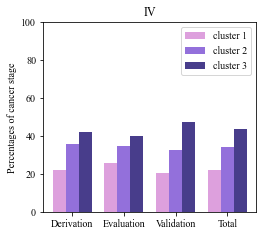

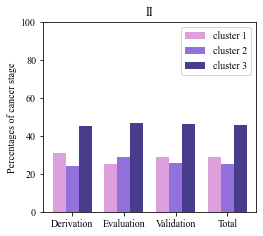

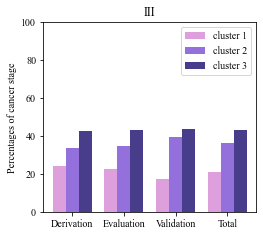

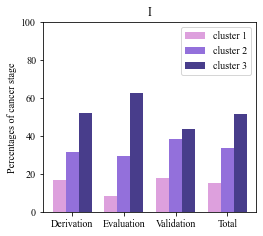

In [51]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt 

with PdfPages('柱状图-Stage.pdf') as pdf:
    for i in range(len(Stage_name)):
        
        number_0 = []; number_1 = []; number_2 = []
        name = Stage_name
        # 总癌数
        try:
            num_total_train = data_train.Stage.value_counts()[Stage_name[i]]
        except IndexError:
            num_total_train = 1; num_train = 0
        except KeyError:
            num_total_train = 1; num_train = 0
        else:
            num_total_train = data_train.Stage.value_counts()[Stage_name[i]]; num_train = data_train.Stage.value_counts()[Stage_name[i]]
            
        try:
            num_total_test = data_test.Stage.value_counts()[Stage_name[i]]
        except IndexError:
            num_total_test = 1; num_test = 0
        except KeyError:
            num_total_test = 1; num_test = 0
        else:
            num_total_test = data_test.Stage.value_counts()[Stage_name[i]]; num_test = data_test.Stage.value_counts()[Stage_name[i]]
        
        try:
            num_total_validation = data_validation.Stage.value_counts()[Stage_name[i]]
        except IndexError:
            num_total_validation = 1; num_validation = 0
        except KeyError:
            num_total_validation = 1; num_validation = 0
        else:
            num_total_validation = data_validation.Stage.value_counts()[Stage_name[i]]; num_validation = data_validation.Stage.value_counts()[Stage_name[i]]
        ######################## cluster 0
        # train
        ana_data = data_train[data_train['cluster'] == 0] # 聚类
        try:
            Stage_num_train = ana_data.Stage.value_counts()[Stage_name[i]]
        except IndexError:
            Stage_num_train = 0
        except KeyError:
            Stage_num_train = 0
        else:
            Stage_num_train = ana_data.Stage.value_counts()[Stage_name[i]]
        Stage_num = Stage_num_train / num_total_train
        number_0.append(Stage_num*100)
        # test
        ana_data = data_test[data_test['cluster'] == 0] # 聚类
        try:
            Stage_num_test = ana_data.Stage.value_counts()[Stage_name[i]]
        except IndexError:
            Stage_num_test = 0
        except KeyError:
            Stage_num_test = 0
        else:
            Stage_num_test = ana_data.Stage.value_counts()[Stage_name[i]]
        Stage_num = Stage_num_test / num_total_test
        number_0.append(Stage_num*100)
        # validation
        ana_data = data_validation[data_validation['cluster'] == 0] # 聚类
        try:
            Stage_num_validation = ana_data.Stage.value_counts()[Stage_name[i]]
        except IndexError:
            Stage_num_validation = 0
        except KeyError:
            Stage_num_validation = 0
        else:
            Stage_num_validation = ana_data.Stage.value_counts()[Stage_name[i]]
        Stage_num = Stage_num_validation / num_total_validation
        number_0.append(Stage_num*100)
        # total
        Stage_num = (Stage_num_train + Stage_num_test + Stage_num_validation) / (num_train + num_test + num_validation)
        number_0.append(Stage_num*100)
            
        ######################## cluster 1
        # train
        ana_data = data_train[data_train['cluster'] == 1] # 聚类
        try:
            Stage_num_train = ana_data.Stage.value_counts()[Stage_name[i]]
        except IndexError:
            Stage_num_train = 0
        except KeyError:
            Stage_num_train = 0
        else:
            Stage_num_train = ana_data.Stage.value_counts()[Stage_name[i]]
        Stage_num = Stage_num_train / num_total_train
        number_1.append(Stage_num*100)
        # test
        ana_data = data_test[data_test['cluster'] == 1] # 聚类
        try:
            Stage_num_test = ana_data.Stage.value_counts()[Stage_name[i]]
        except IndexError:
            Stage_num_test = 0
        except KeyError:
            Stage_num_test = 0
        else:
            Stage_num_test = ana_data.Stage.value_counts()[Stage_name[i]]
        Stage_num = Stage_num_test / num_total_test
        number_1.append(Stage_num*100)
        # validation
        ana_data = data_validation[data_validation['cluster'] == 1] # 聚类
        try:
            Stage_num_validation = ana_data.Stage.value_counts()[Stage_name[i]]
        except IndexError:
            Stage_num_validation = 0
        except KeyError:
            Stage_num_validation = 0
        else:
            Stage_num_validation = ana_data.Stage.value_counts()[Stage_name[i]]
        Stage_num = Stage_num_validation / num_total_validation
        number_1.append(Stage_num*100)
        # total
        Stage_num = (Stage_num_train + Stage_num_test + Stage_num_validation) / (num_train + num_test + num_validation)
        number_1.append(Stage_num*100)  
        
        ######################## cluster 2
        # train
        ana_data = data_train[data_train['cluster'] == 2] # 聚类
        try:
            Stage_num_train = ana_data.Stage.value_counts()[Stage_name[i]]
        except IndexError:
            Stage_num_train = 0
        except KeyError:
            Stage_num_train = 0
        else:
            Stage_num_train = ana_data.Stage.value_counts()[Stage_name[i]]
        Stage_num = Stage_num_train / num_total_train
        number_2.append(Stage_num*100)
        # test
        ana_data = data_test[data_test['cluster'] == 2] # 聚类
        try:
            Stage_num_test = ana_data.Stage.value_counts()[Stage_name[i]]
        except IndexError:
            Stage_num_test = 0
        except KeyError:
            Stage_num_test = 0
        else:
            Stage_num_test = ana_data.Stage.value_counts()[Stage_name[i]]
        Stage_num = Stage_num_test / num_total_test
        number_2.append(Stage_num*100)
        # validation
        ana_data = data_validation[data_validation['cluster'] == 2] # 聚类
        try:
            Stage_num_validation = ana_data.Stage.value_counts()[Stage_name[i]]
        except IndexError:
            Stage_num_validation = 0
        except KeyError:
            Stage_num_validation = 0
        else:
            Stage_num_validation = ana_data.Stage.value_counts()[Stage_name[i]]
        Stage_num = Stage_num_validation / num_total_validation
        number_2.append(Stage_num*100)
        # total
        Stage_num = (Stage_num_train + Stage_num_test + Stage_num_validation) / (num_train + num_test + num_validation)
        number_2.append(Stage_num*100)         
        
        # 三组数据
        fig = plt.figure(figsize=(13, 3.5))
        plt.rc('font', family='Times New Roman')
        plt.subplot(132)
        labels = ['Derivation', 'Evaluation', 'Validation', 'Total']
        x = np.arange(len(labels))  # x轴刻度标签位置
        width = 0.25  # 柱子的宽度
        # 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
        # x - width，x， x + width即每组数据在x轴上的位置
        plt.bar(x - width, number_0, width, color='#DDA0DD', label='cluster 1')
        plt.bar(x, number_1, width, color='#9370DB', label='cluster 2')
        plt.bar(x + width, number_2, width, color='#483D8B', label='cluster 3')
        plt.ylabel('Percentages of cancer stage')
        plt.ylim(0, 100)
        plt.title(Stage_name[i])
        # x轴刻度标签位置不进行计算
        plt.xticks(x, labels=labels)
        plt.legend(loc="upper right")
        pdf.savefig(fig)
        plt.show()
        plt.close()

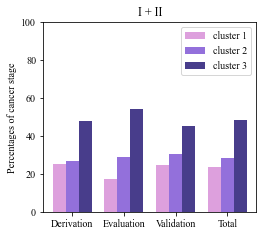

In [59]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt 

with PdfPages('柱状图-Stage.pdf') as pdf:
        
    number_0 = []; number_1 = []; number_2 = []
    name = Stage_name
    # 总癌数
    try:
        num_total_train = data_train.Stage.value_counts()[Stage_name[1]] + data_train.Stage.value_counts()[Stage_name[3]]
    except IndexError:
        num_total_train = 1; num_train = 0
    except KeyError:
        num_total_train = 1; num_train = 0
    else:
        num_total_train = data_train.Stage.value_counts()[Stage_name[1]] + data_train.Stage.value_counts()[Stage_name[3]]
        num_train = data_train.Stage.value_counts()[Stage_name[1]] + data_train.Stage.value_counts()[Stage_name[3]]

    try: 
        num_total_test = data_test.Stage.value_counts()[Stage_name[1]] + data_test.Stage.value_counts()[Stage_name[3]]
    except IndexError:
        num_total_test = 1; num_test = 0
    except KeyError:
        num_total_test = 1; num_test = 0
    else:
        num_total_test = data_test.Stage.value_counts()[Stage_name[1]] + data_test.Stage.value_counts()[Stage_name[3]]
        num_test = data_test.Stage.value_counts()[Stage_name[1]] + data_test.Stage.value_counts()[Stage_name[3]]

    try:
        num_total_validation = data_validation.Stage.value_counts()[Stage_name[1]] + data_validation.Stage.value_counts()[Stage_name[3]]
    except IndexError:
        num_total_validation = 1; num_validation = 0
    except KeyError:
        num_total_validation = 1; num_validation = 0
    else:
        num_total_validation = data_validation.Stage.value_counts()[Stage_name[1]] + data_validation.Stage.value_counts()[Stage_name[3]]
        num_validation = data_validation.Stage.value_counts()[Stage_name[1]] + data_validation.Stage.value_counts()[Stage_name[3]]
    ######################## cluster 0
    # train
    ana_data = data_train[data_train['cluster'] == 0] # 聚类
    try:
        Stage_num_train = ana_data.Stage.value_counts()[Stage_name[1]] + ana_data.Stage.value_counts()[Stage_name[3]]
    except IndexError:
        Stage_num_train = 0
    except KeyError:
        Stage_num_train = 0
    else:
        Stage_num_train = ana_data.Stage.value_counts()[Stage_name[1]] + ana_data.Stage.value_counts()[Stage_name[3]]
    Stage_num = Stage_num_train / num_total_train
    number_0.append(Stage_num*100)
    # test
    ana_data = data_test[data_test['cluster'] == 0] # 聚类
    try:
        Stage_num_test = ana_data.Stage.value_counts()[Stage_name[1]] + ana_data.Stage.value_counts()[Stage_name[3]]
    except IndexError:
        Stage_num_test = 0
    except KeyError:
        Stage_num_test = 0
    else:
        Stage_num_test = ana_data.Stage.value_counts()[Stage_name[1]] + ana_data.Stage.value_counts()[Stage_name[3]]
    Stage_num = Stage_num_test / num_total_test
    number_0.append(Stage_num*100)
    # validation
    ana_data = data_validation[data_validation['cluster'] == 0] # 聚类
    try:
        Stage_num_validation = ana_data.Stage.value_counts()[Stage_name[1]] + ana_data.Stage.value_counts()[Stage_name[3]]
    except IndexError:
        Stage_num_validation = 0
    except KeyError:
        Stage_num_validation = 0
    else:
        Stage_num_validation = ana_data.Stage.value_counts()[Stage_name[1]] + ana_data.Stage.value_counts()[Stage_name[3]]
    Stage_num = Stage_num_validation / num_total_validation
    number_0.append(Stage_num*100)
    # total
    Stage_num = (Stage_num_train + Stage_num_test + Stage_num_validation) / (num_train + num_test + num_validation)
    number_0.append(Stage_num*100)

    ######################## cluster 1
    # train
    ana_data = data_train[data_train['cluster'] == 1] # 聚类
    try:
        Stage_num_train = ana_data.Stage.value_counts()[Stage_name[1]] + ana_data.Stage.value_counts()[Stage_name[3]]
    except IndexError:
        Stage_num_train = 0
    except KeyError:
        Stage_num_train = 0
    else:
        Stage_num_train = ana_data.Stage.value_counts()[Stage_name[1]] + ana_data.Stage.value_counts()[Stage_name[3]]
    Stage_num = Stage_num_train / num_total_train
    number_1.append(Stage_num*100)
    # test
    ana_data = data_test[data_test['cluster'] == 1] # 聚类
    try:
        Stage_num_test = ana_data.Stage.value_counts()[Stage_name[1]] + ana_data.Stage.value_counts()[Stage_name[3]]
    except IndexError:
        Stage_num_test = 0
    except KeyError:
        Stage_num_test = 0
    else:
        Stage_num_test = ana_data.Stage.value_counts()[Stage_name[1]] + ana_data.Stage.value_counts()[Stage_name[3]]
    Stage_num = Stage_num_test / num_total_test
    number_1.append(Stage_num*100)
    # validation
    ana_data = data_validation[data_validation['cluster'] == 1] # 聚类
    try:
        Stage_num_validation = ana_data.Stage.value_counts()[Stage_name[1]] + ana_data.Stage.value_counts()[Stage_name[3]]
    except IndexError:
        Stage_num_validation = 0
    except KeyError:
        Stage_num_validation = 0
    else:
        Stage_num_validation = ana_data.Stage.value_counts()[Stage_name[1]] + ana_data.Stage.value_counts()[Stage_name[3]]
    Stage_num = Stage_num_validation / num_total_validation
    number_1.append(Stage_num*100)
    # total
    Stage_num = (Stage_num_train + Stage_num_test + Stage_num_validation) / (num_train + num_test + num_validation)
    number_1.append(Stage_num*100)  

    ######################## cluster 2
    # train
    ana_data = data_train[data_train['cluster'] == 2] # 聚类
    try:
        Stage_num_train = ana_data.Stage.value_counts()[Stage_name[1]] + ana_data.Stage.value_counts()[Stage_name[3]]
    except IndexError:
        Stage_num_train = 0
    except KeyError:
        Stage_num_train = 0
    else:
        Stage_num_train = ana_data.Stage.value_counts()[Stage_name[1]] + ana_data.Stage.value_counts()[Stage_name[3]]
    Stage_num = Stage_num_train / num_total_train
    number_2.append(Stage_num*100)
    # test
    ana_data = data_test[data_test['cluster'] == 2] # 聚类
    try:
        Stage_num_test = ana_data.Stage.value_counts()[Stage_name[1]] + ana_data.Stage.value_counts()[Stage_name[3]]
    except IndexError:
        Stage_num_test = 0
    except KeyError:
        Stage_num_test = 0
    else:
        Stage_num_test = ana_data.Stage.value_counts()[Stage_name[1]] + ana_data.Stage.value_counts()[Stage_name[3]]
    Stage_num = Stage_num_test / num_total_test
    number_2.append(Stage_num*100)
    # validation
    ana_data = data_validation[data_validation['cluster'] == 2] # 聚类
    try:
        Stage_num_validation = ana_data.Stage.value_counts()[Stage_name[1]] + ana_data.Stage.value_counts()[Stage_name[3]]
    except IndexError:
        Stage_num_validation = 0
    except KeyError:
        Stage_num_validation = 0
    else:
        Stage_num_validation = ana_data.Stage.value_counts()[Stage_name[1]] + ana_data.Stage.value_counts()[Stage_name[3]]
    Stage_num = Stage_num_validation / num_total_validation
    number_2.append(Stage_num*100)
    # total
    Stage_num = (Stage_num_train + Stage_num_test + Stage_num_validation) / (num_train + num_test + num_validation)
    number_2.append(Stage_num*100)         

    # 三组数据
    fig = plt.figure(figsize=(13, 3.5))
    plt.rc('font', family='Times New Roman')
    plt.subplot(132)
    labels = ['Derivation', 'Evaluation', 'Validation', 'Total']
    x = np.arange(len(labels))  # x轴刻度标签位置
    width = 0.25  # 柱子的宽度
    # 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
    # x - width，x， x + width即每组数据在x轴上的位置
    plt.bar(x - width, number_0, width, color='#DDA0DD', label='cluster 1')
    plt.bar(x, number_1, width, color='#9370DB', label='cluster 2')
    plt.bar(x + width, number_2, width, color='#483D8B', label='cluster 3')
    plt.ylabel('Percentages of cancer stage')
    plt.ylim(0, 100)
    plt.title(Stage_name[3] + " + " + Stage_name[1])
    # x轴刻度标签位置不进行计算
    plt.xticks(x, labels=labels)
    plt.legend(loc="upper right")
    pdf.savefig(fig)
    plt.show()
    plt.close()